# Built-in Transients


`skysurvey` has built-in transients (any supernovae) and offer the possibitly to create new ones.

***
## skysurvey & sncosmo: use any sncosmo transient

`skysurvey` is based on [sncosmo](https://sncosmo.readthedocs.io/en/stable/) for the transient modelling. As such, it offers the possibility to simulate any transient already available in [sncosmo](https://sncosmo.readthedocs.io/en/stable/) (see [sncosmo transients](https://sncosmo.readthedocs.io/en/stable/source-list.html#list-of-built-in-sources)). `skysurvey` provides the way to simulate the transient model parameters and generate the simulated transient as it would be observed by a survey.

***
## TimeSeries (single-object non-Ia model)

To simulate a single-class of object from a given transient, pick any name from the [sncosmo transient model](https://sncosmo.readthedocs.io/en/stable/source-list.html#list-of-built-in-sources). 

**Say, for instance 'v19-2013ge-corr', a Type Ic modelled as a `sncosmo.TimeSeriesSource` (like all non-Ia models):**

Any `sncosmo.TimeSeriesSource` model can be loaded using the `skysurvey.TSTransient` object:

In [1]:
from skysurvey import target
transient = target.TSTransient.from_sncosmo_source("v19-2013ge-corr") # load it
data = transient.draw(size=5_000) # and draw data | see options
# data also stored as transient.data

Text(0.5, 0, 'redshift')

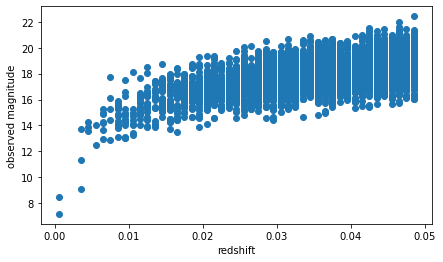

In [2]:
fig = transient.show_scatter("z","magobs")
ax = fig.axes[0]
ax.set_ylabel("observed magnitude")
ax.set_xlabel("redshift")

you can change e.g. the absolute magnitude of transient, let's imagine you want -17.2 in average with a (gaussian) scatter of 0.2 mag. 

Text(0.5, 0, 'redshift')

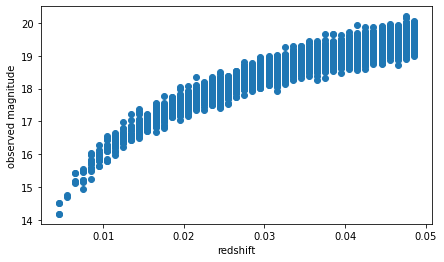

In [3]:
transient = target.TSTransient.from_sncosmo_source("v19-2013ge-corr", magabs=-17.2, magscatter=0.2) # load it
data = transient.draw(size=5_000) # and draw data | see options
# And plot
fig = transient.show_scatter("z","magobs")
ax = fig.axes[0]
ax.set_ylabel("observed magnitude")
ax.set_xlabel("redshift")

you can finally directly load and draw directly using the `from_draw` classmethod.

In [4]:
%%time
transient = target.TSTransient.from_draw("v19-2013ge-corr", size=10_000, zmin=0.05, zmax=0.08)

CPU times: user 89.5 ms, sys: 3 ms, total: 92.5 ms
Wall time: 91 ms


**speed** skysurvey model drawing is fast. <100ms for 10_000 targets

***
## Type Ia Supernovae

The Type Ia supernovae (SNeIa) have a dedicated class for they have slight more detailed modelling of their parameters. The default model graph is made such that x1 and c are drawn from underlying distributions (see `target.SNeIa._MODEL`) and the resulting magabs (leading to magobs that itself leads to x0) accounts for the x1 and c values. 

It is easy to complexify this model as much as you want, see the Build Complex model tutorial.

In [5]:
snia = target.SNeIa.from_draw(10_000)

In [6]:
snia.data

,z,x1,c,t0,magabs,magobs,x0,ra,dec
0,0.1425,-1.900000e+00,0.07,56868.171875,-18.703793,20.511824,0.000099,271.956482,-9.616769
1,0.1875,-1.421085e-14,0.04,56722.402344,-19.208437,20.662182,0.000086,212.594574,-20.019440
2,0.1885,4.500000e-01,0.13,56716.171875,-18.909201,20.974241,0.000065,214.799667,4.300497
3,0.1815,-9.500000e-01,0.08,56190.179688,-19.120365,20.671967,0.000085,50.515423,55.079872
4,0.1895,-2.500000e-01,-0.02,56276.625000,-19.450274,20.445927,0.000105,340.198578,7.444125
...,...,...,...,...,...,...,...,...,...
9995,0.0845,-4.500000e-01,0.10,56111.257812,-19.011690,18.987276,0.000403,40.438503,16.805922
9996,0.0965,9.000000e-01,0.01,56788.691406,-19.434355,18.870459,0.000449,196.177673,40.114487
9997,0.1635,1.700000e+00,0.04,56073.503906,-19.507591,20.034565,0.000154,20.852654,0.685304
9998,0.1365,-1.450000e+00,0.03,56837.390625,-19.124626,19.989418,0.000160,157.393524,16.216921


Text(0.5, 0, 'redshift')

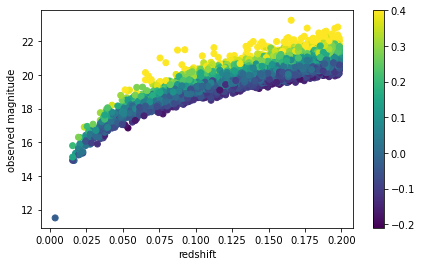

In [7]:
fig = snia.show_scatter("z", "magobs", ckey="c", vmax=0.4)
ax = fig.axes[0]
ax.set_ylabel("observed magnitude")
ax.set_xlabel("redshift")

***
## Core-Collapse: Type II, IIn, IIb, Ib, Ic Ic-BL

There are pre-built "composite transient" that are made of various sncosmo template. 

As for now only the 6 "Vincenzi" (`v19-*-corr`) core collapse SN models have been implemented. 
That is, Type II, IIn, IIb, Ib, Ic Ic-BL.

They behave like other `skysurvey.Transient`, the template id is shown in the template columns.

All TimeSeriesSource composing the composite transient have by default the same magabs and rate, but you can change that easily as long the this broadcast with the template sources (e.g. 1 value or as many values as there are sources).

In [22]:
import pandas
import sncosmo
from sncosmo import models

In [23]:
from skysurvey.target import sncc

In [24]:
snic = sncc.SNeIb.from_draw(size=10_000)
snic.data

,template,z,t0,magabs,magobs,amplitude,ra,dec
0,54,0.0415,57071.276220,-18.969490,17.420189,1.343060e-14,102.486175,29.026194
1,44,0.0415,56251.292270,-17.893510,18.496169,2.064196e-13,69.125296,-51.017439
2,34,0.0435,56836.484511,-17.910660,18.584351,3.372003e-14,323.294057,-27.256724
3,34,0.0285,56786.640436,-18.118157,17.434961,9.719499e-14,193.091552,-31.178099
4,59,0.0425,56516.184113,-18.625506,17.817442,5.598826e-15,48.387625,-29.796327
...,...,...,...,...,...,...,...,...
9995,57,0.0485,56227.338370,-19.259659,17.479390,2.911177e-14,109.401334,5.646471
9996,16,0.0335,57455.448015,-18.581564,17.330502,6.474006e-15,70.784999,63.097200
9997,13,0.0385,56140.561543,-17.966083,18.255953,9.457449e-15,8.840811,-47.340288
9998,34,0.0415,56336.360033,-18.405678,17.984002,5.861756e-14,12.544395,18.784864


In [25]:
snic.templates

['v19-asassn14jb-corr',
 'v19-asassn15oz-corr',
 'v19-1987a-corr',
 'v19-1993j-corr',
 'v19-1994i-corr',
 'v19-1998bw-corr',
 'v19-1999dn-corr',
 'v19-1999em-corr',
 'v19-2002ap-corr',
 'v19-2004aw-corr',
 'v19-2004et-corr',
 'v19-2004fe-corr',
 'v19-2004gq-corr',
 'v19-2004gt-corr',
 'v19-2004gv-corr',
 'v19-2005bf-corr',
 'v19-2005hg-corr',
 'v19-2006t-corr',
 'v19-2006aa-corr',
 'v19-2006aj-corr',
 'v19-2006ep-corr',
 'v19-2007y-corr',
 'v19-2007gr-corr',
 'v19-2007od-corr',
 'v19-2007pk-corr',
 'v19-2007ru-corr',
 'v19-2007uy-corr',
 'v19-2008d-corr',
 'v19-2008aq-corr',
 'v19-2008ax-corr',
 'v19-2008bj-corr',
 'v19-2008bo-corr',
 'v19-2008fq-corr',
 'v19-2008in-corr',
 'v19-2009n-corr',
 'v19-2009bb-corr',
 'v19-2009bw-corr',
 'v19-2009dd-corr',
 'v19-2009ib-corr',
 'v19-2009ip-corr',
 'v19-2009iz-corr',
 'v19-2009jf-corr',
 'v19-2009kr-corr',
 'v19-2010al-corr',
 'v19-2011bm-corr',
 'v19-2011dh-corr',
 'v19-2011ei-corr',
 'v19-2011fu-corr',
 'v19-2011hs-corr',
 'v19-2011ht-corr',